Osnabrück University - A&C: Computational Cognition (Summer Term 2019)

# Exercise Sheet 04: Analysis of behavioural data (part 2)

## Introduction

This week's sheet should be solved and handed in at 14:00 at **Tuesday, May 14, 2019**. If you need help (and Google and other resources were not enough), feel free to contact your tutors. Please push your results to your Github group folder.

In this exercise sheet we will have a closer look on the data of Seahaven using analysing techniques like ANOVA, linear regression models and t-tests. For the correct results we will provide you with the finalized data that you only have to read in. Note that especially the data for assignment 2 and 3 underwent some further preprocesing than what we did in the previous exercise.

## Assignment 0: Peer review for sheet 03 [3 pts]

Open an issue in the repository of the groups you have to check. The title of the issue should be your group name (e.g. "Group1). Comment on what was good and what was bad, the aesthetics and ease of reading the plots, what you would have done differently and how many points you would give them for their solutions.

| * |Group 1|Group 2|Group 3|Group 4|Group 5|Group 6|Group 7|Group 8|Group 9|Group 10|Group 11|
| ------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------ | ------ |
| check solutions of group: | 6, 2 | 10, 7  | 1, 6  | 8, 9 | 7, 1 | 9, 8 | 3, 10  | 5, 11  | 4, 3  | 11, 5 | 2, 4  |

Please also evaluate nice coding style with up to two points.

In [24]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import ptitprince as pt
import seaborn as sns
sns.set()
from PIL import Image
from scipy import stats
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.api import anova_lm
from statsmodels.formula.api import ols



## Assignment 1: Linear Regression Model Based on Performance and Reaction Time [2 pts]

Although the linear regression in the prior exercise sheet (assignment 2.a) does not suggest a relationship between RT and performance (accuracy) for the relative task, we still want to check how much of the performance is explained by the RT. To do so we fit a linear regression model by using the ```ols``` method in the ```statsmodels``` library for both of the time conditions (3sec and Infinite).

- Read ```AllData.csv``` into the dataframe ```AllData``` and take only the data of the relative task. 
- Split the data of the relative task: Create ```SecData``` with the data of the 3sec-condition and ```InfData``` with the data of the Infinite-condition.
- For each dataset (SecData, InfData) use the ```statsmodels```’ ```ols``` function to initialise a simple linear regression model. <br> The ```ols``` function takes the following: **ols("y ~ X", df)**, where X is the predictor variable ("ReactionTime"), y is the output variable ("Performance") and df is the dataframe of the used data.
- Have a look on the R-squared values and interpret them.

Take a look at the [ols documentation](https://www.statsmodels.org/stable/index.html) and the [patsy documentation](https://patsy.readthedocs.io/en/v0.1.0/formulas.html) to get a feeling how to use the function.

In [2]:
# read the csv file into a dataframe
AllData = pd.read_csv('Data/AllData.csv')

# filter out data for tasks other than the 'Relative' task
AllData = AllData[AllData['Task'] == 'Relative']

# split the data into the 3-sec and infinite time conditions
SecData = AllData[AllData['Time'] == '3sec']
InfData = AllData[AllData['Time'] == 'Infinite']

# run an OLS regression analysis for the 3-sec time condition and print the results
sec_results = ols('Performance ~ ReactionTime', SecData).fit()
print('The results of the OLS regression for the infinite-condition:\n')
print(sec_results.summary())

# run an OLS regression analysis for the infinite time condition and print the results
inf_results = ols('Performance ~ ReactionTime', InfData).fit()
print('\n\n\nThe results of the OLS regression for the infinite-condition:\n')
print(inf_results.summary())


The results of the OLS regression for the infinite-condition:

                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     4.195
Date:                Thu, 23 May 2019   Prob (F-statistic):             0.0433
Time:                        14:08:16   Log-Likelihood:                 78.822
No. Observations:                  97   AIC:                            -153.6
Df Residuals:                      95   BIC:                            -148.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

### On R-Squared Values

**R-squared is the percentage of data samples explained by the regression line, to the rest of data samples. So it varies between 0 and 100% and the higher the percentage, the better the regression line is explaining our data spread.**
**Regarding that, both results are poorly explaining the modelled regression lines, though it is a bit better in case of infinite condition (about 12% to 4% for 3-sec time condition).**
**That means there is no meaningful relationship between the reaction time and performance.**

****

## Assignment 2: Testing Task Performance via ANOVA [5 pts]

For this assignment we will have a look on the whole data without caring about the different measurements.

### a) Task Performance [2 pts]

Refering to our plots of the prior exercise sheet (assignment 2.b), it is a good idea to have a closer look on the task performance (accuracy) to check if there are some **significant effects, i.e. p < 0.05**. To do so we will first of all visualize the data with a raincloud-plot using ```ptitprince.RainCloud``` as a density estimate and then calculate the ANOVAs. Make sure to run ```pip install ptitprince``` in your activated acc environment beforehand.

- Read ```MapPerformances.csv``` into the dataframe ```AllPerformances```.
- Make a RainCloud-plot of the tasks (x-axis) and performance (y-axis) for both time conditions (3sec / Infinite). The y-axis should start at 0.25 and end at 0.75.
- Have a look at ```help(pt.RainCloud)``` to get an overview of the different parameters that you can modify to create a nice raincloud-plot.

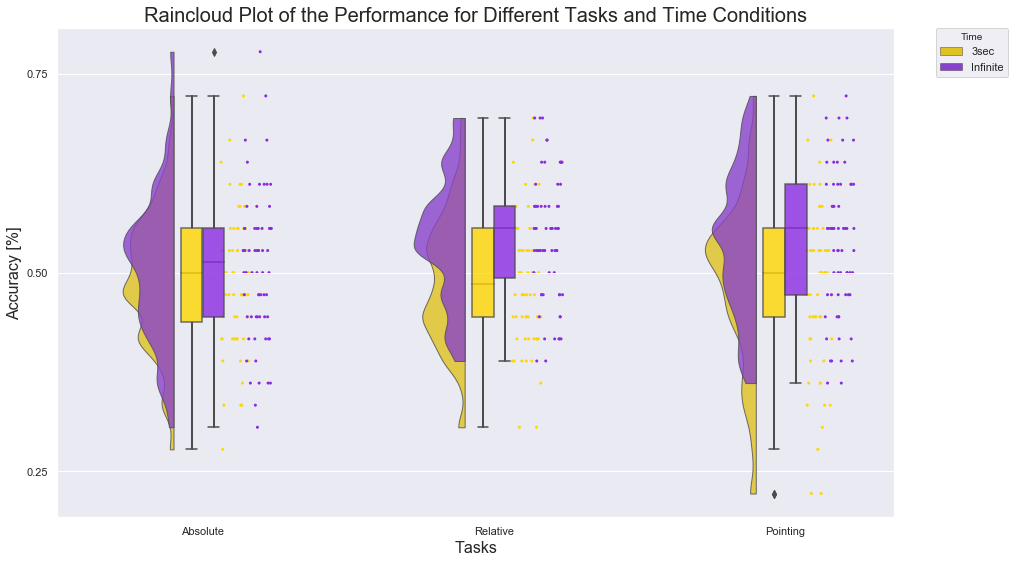

In [3]:
# read the csv file into a dataframe
AllPerformances = pd.read_csv('Data/MapPerformances.csv')

# plot RainCloud
fig = pt.RainCloud(x='Task', y='Performance', hue='Time', data=AllPerformances,
                   move=.15, dodge=True, alpha=.8, offset=.1, palette = ['gold', 'blueviolet'],
                   width_viol =0.35, scale='area', figsize=(15,9))

# set plot title and other stuff
fig.set_title('Raincloud Plot of the Performance for Different Tasks and Time Conditions', fontsize=20)
fig.set_ylabel('Accuracy [%]', fontsize=16)
fig.set_xlabel('Tasks', fontsize=16)
fig.set_yticks(np.arange(0.25, .76, step=0.25));

Using the data of ```AllPerformances``` we now want to calculate a **two-way ANOVA**. A two-way ANOVA is a statistical test used to determine the effect of two nominal predictor variables (= independent variables) on a continuous outcome variable (= dependent variable).

H$_{01}$ = The performance is the same for the different tasks. <br>
H$_{02}$ = The performance is the same for the different time conditions. <br>
H$_{03}$ = An interaction effect does not exist.

- Given the null hypotheses above, what is the outcome variable and what are the predictor variables that you have to use for the two-way ANOVA?
- Use ```statsmodels```’ ```ols``` function to create an ordinary least squares model as a precursor to the ANOVA. <br> The ```ols``` function takes the following: **ols("y ~ C(X1) * C(X2)", df)**, where X1 and X2 are the predictor variables, y is the output variable and df is the dataframe of the used data.
- With the result of the ols calculate a **type 2** two-way ANOVA using ```statsmodels```’ ```anova_lm```.
- Based on the ANOVA table explain which of the null hypotheses can be rejected. What does this outcome tell you?

Take a look at the [ols documentation](https://www.statsmodels.org/stable/index.html), the [patsy documentation](https://patsy.readthedocs.io/en/v0.1.0/formulas.html) and the [anova_lm documentation](http://www.statsmodels.org/dev/anova.html) to get a feeling how to use these functions.

### The Outcome and the Predictor Variables

**All these hypotheses are discussing effects of different variables on the performance, so the outcome variable is 'Performance' or the accuracy of respondents in accomplishing the tasks.**
**And the predictor variables would be the (differences between) tasks, and the (differences between) the time conditions**

In [4]:
# create an OLS model for the independent and dependant variables
results = ols('Performance ~ Task * Time', AllPerformances).fit()

# and print the results
print('The results of the OLS model between performance and task/time:\n')
print(results.summary())


# run a two-way ANOVA calculation with the OLS results
table = anova_lm(results, typ=2)

# and print the results
print('\n\n\nThe results of two-way ANOVA for the OLS results:\n')
print(table)

The results of the OLS model between performance and task/time:

                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     4.969
Date:                Thu, 23 May 2019   Prob (F-statistic):           0.000203
Time:                        14:08:17   Log-Likelihood:                 389.12
No. Observations:                 384   AIC:                            -766.2
Df Residuals:                     378   BIC:                            -742.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

### Two-Way ANOVA Results

**Regarding our significance level (p < 0.05), there is no significant difference between the performance of the participants in different tasks. But a P-value such 0.000020 would reassures us about the meaningfulness of the performance/accuracy difference between the two time condition. That is, the time condition affects the accuracy. Though we could not conclude that if the P-value of the two independent (predictor) variables were significant. But here the P-value of their interaction is 0.174424, and greater than our significance level, so that makes us sure about our conclusion on the relation between the time condition and performance.**

****

### b) Task Performance: 3sec Condition vs. Infinite Condition [3 pts]

Let's take a closer look onto the single time conditions by calculating a **one-way ANOVA** for each time condition (3sec and Infinite). A one-way ANOVA is a statistical test used to determine the effect of one nominal predictor variable (= independent variable) on a continuous outcome variable (= dependent variable). 

H$_{01}$ = The performance is the same for the different tasks. <br>

- Use the data of ```AllPerformances``` and split it: Create ```SecPerformances``` with the data of the 3sec-condition and ```InfPerformances``` with the data of the Infinite-condition.
- Given the null hypothesis above, what is the outcome variable and what is the predictor variable that you have to use for the one-way ANOVAs?

Do for each dataset (SecPerformances, InfPerformances):

- Use ```statsmodels```’ ```ols``` function to create an ordinary least squares model as a precursor to the ANOVA. The ```ols``` function takes the formula <br> The ```ols``` function takes the following: **ols("y ~ C(X)", df)**, where X is the predictor variable, y is the output variable and df is the dataframe of the used data.
- With the result of the ols calculate a **type 1** one-way ANOVA using ```statsmodels```’ ```anova_lm```.
- Based on the ANOVA table explain if the null hypothesis can be rejected. What does this outcome tell you?

Take a look at the [ols documentation](https://www.statsmodels.org/stable/index.html) and the [patsy documentation](https://patsy.readthedocs.io/en/v0.1.0/formulas.html) to get a feeling how to use this function.

In [5]:
# split all performance data into two dataframes based on their time conditions
SecPerformances = AllPerformances[AllPerformances['Time'] == '3sec']
InfPerformances = AllPerformances[AllPerformances['Time'] == 'Infinite']


### The Outcome and the Predictor Variables

**The outcome variable, again, is the performance or accuracy of participants in accomplishing the tasks. And the predictor variable, here is the (difference between) tasks.**

In [6]:
# ------------------------------------------------------------
# Testing SecPerformances Dataset
# ------------------------------------------------------------

# create an OLS model between tasks and performance
sec_results_pre_ANOVA = ols('Performance ~ Task', data=SecPerformances).fit()

# and print the results
print('The results of the OLS model between performance and task in 3-sec time condition:\n')
print(results.summary())

# use the OLS results to calculate a one-way ANOVA
table = anova_lm(sec_results_pre_ANOVA, typ=1)

# and print the results
print('\n\nThe results of one-way ANOVA for the OLS results:\n')
print(table)

print('\n\n\n-----------------------------------------------------------------------------------\n\n\n')
# ------------------------------------------------------------
# Testing InfPerformances Dataset
# ------------------------------------------------------------

# create an OLS model between tasks and performance
inf_results_pre_ANOVA = ols('Performance ~ Task', data=InfPerformances).fit()

# and print the results
print('The results of the OLS model between performance and task in infinite time condition:\n')
print(results.summary())

# use the OLS results to calculate a one-way ANOVA
table = anova_lm(inf_results_pre_ANOVA, typ=1)

# and print the results
print('\n\nThe results of one-way ANOVA for the OLS results:\n')
print(table)



The results of the OLS model between performance and task in 3-sec time condition:

                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     4.969
Date:                Thu, 23 May 2019   Prob (F-statistic):           0.000203
Time:                        14:08:17   Log-Likelihood:                 389.12
No. Observations:                 384   AIC:                            -766.2
Df Residuals:                     378   BIC:                            -742.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------

### One-Way ANOVA Results

**Regarding our significance level (p < 0.05), there is obviously no significant difference between the performance of the participants in different tasks under 3-sec time condition. But the P-value for the time condition of infinite time is significant. That is we reject the null hypothesis for the time condition 'infinite' but not the time condition '3-sec.'**

****

If there is a significant outcome for one of the datasets (SecPerformances or InfPerformances), make a post-hoc paired t-test using this dataset.

- Extract the performances for each task (Absolute, Relative, Pointing).
- Compare the performances of the different tasks pairwise using ```scipy.stats.ttest_rel```
- Why do we need to do further post-hoc tests and what do they tell us?

In [7]:
# extract the performances for each task
AbsPerformances = InfPerformances[InfPerformances['Task'] == 'Absolute']['Performance']
RelPerformances = InfPerformances[InfPerformances['Task'] == 'Relative']['Performance']
PoiPerformances = InfPerformances[InfPerformances['Task'] == 'Pointing']['Performance']

# print the results of t-tests
print('The results of post-hoc paired t-tests:\n')
print('Absolute - Relative: '+str(stats.ttest_rel(AbsPerformances, RelPerformances)))
print('Absolute - Pointing: '+str(stats.ttest_rel(AbsPerformances, PoiPerformances)))
print('Relative - Pointing: '+str(stats.ttest_rel(RelPerformances, PoiPerformances)))

The results of post-hoc paired t-tests:

Absolute - Relative: Ttest_relResult(statistic=-2.549420177654396, pvalue=0.013236758937606112)
Absolute - Pointing: Ttest_relResult(statistic=-1.8697272275281769, pvalue=0.06617015143684292)
Relative - Pointing: Ttest_relResult(statistic=0.38334190525937933, pvalue=0.702756818654483)


### On the Necessity of a Post-Hoc T-Test

**With the ANOVA we found out that there is a significant difference between the performance of participants in different tasks, under the infinite time conditions. But since we have more than two tasks to compare, with a pair-wise t-test we can check and find where and between which two tasks this significant difference is observable.
And the results show that the only significant difference is between the 'Absolute' and the 'Relative' tasks.**

****

## Assignment 3: Testing Task Performance via Repeated Measures ANOVA [3 pts]

Now we want to take a closer look on the task performance (accuracy) also taking the different measurements into account to check if there are some **significant effects, i.e. p < 0.05**. For this purpose we have the averaged performances over 15 repeated measure subjects for three measurements. We will first of all visualize the averaged performances for each task for the three measurements with a catplot and then calculate a repeated measures ANOVA. 

- Read ```RepeatedPerformances.csv``` into the dataframe ```RepeatedPerformances```.
- Make a catplot (kind='barplot') of the conditions (x-axis) and the performance (y-axis). The y-axis should start at 0 and end at 0.75.
- Please note that the conditions in the dataframe correspond to the given "conditions" list.

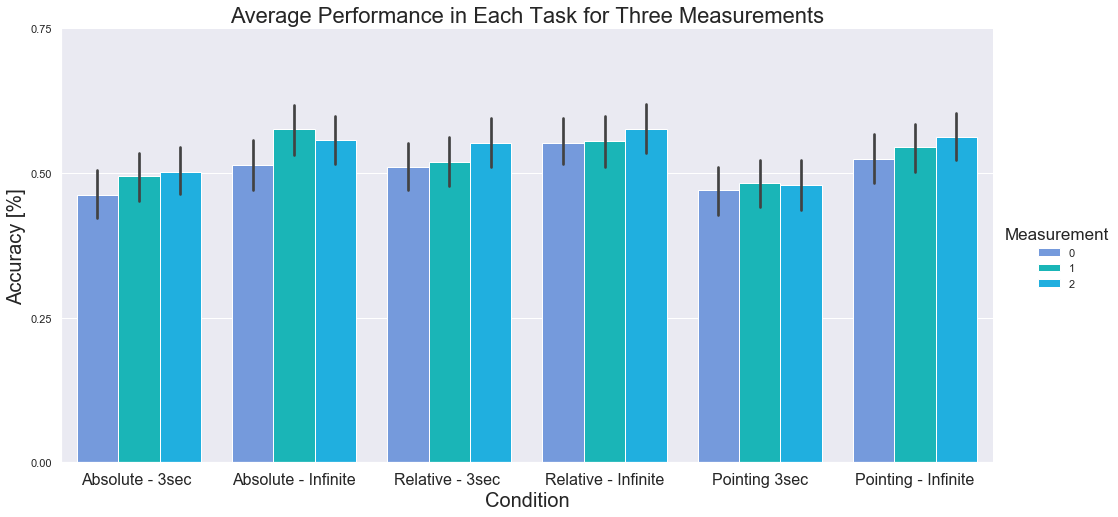

In [12]:
conditions = ['Absolute - 3sec ','Absolute - Infinite','Relative - 3sec ',
              'Relative - Infinite','Pointing 3sec','Pointing - Infinite']

# read the csv file into a dataframe
RepeatedPerformances = pd.read_csv('Data/RepeatedPerformances.csv')

# plot the data
g = sns.catplot(x='Condition', y='Performance', hue='Measurement', data=RepeatedPerformances,
                  kind='bar', height=7, aspect=2, palette=['cornflowerblue', 'darkturquoise','deepskyblue'])

# set plot title and other stuff
g.set(title='Average Performance in Each Task for Three Measurements', yticks=np.arange(0, .76, step=0.25),
      ylabel='Accuracy [%]')
g.set_xticklabels(conditions, size=16)
sns.set_context(rc={'axes.titlesize':22, 'axes.labelsize':20});



In [9]:
# create a usable dataframe for the following analysis
repgroup = RepeatedPerformances.groupby(['Measurement','Subject','Condition'], as_index=False)['Performance'].mean()

RepeatedDf = pd.DataFrame(columns={'Measurement','Subject','Task','Time','Performance'})
tasks = ['Absolute','Absolute','Relative','Relative','Pointing','Pointing']
times = ['3sec','Infinite','3sec','Infinite','3sec','Infinite']
for i in range(270):
    RepeatedDf = RepeatedDf.append({'Subject':repgroup['Subject'][i],'Measurement':repgroup['Measurement'][i],'Task':tasks[repgroup['Condition'][i]],'Time':times[repgroup['Condition'][i]],'Performance':repgroup['Performance'][i]},ignore_index=True)
    

Using the data of ```RepeatedDf``` we want to calculate a **(three-way) repeated measures ANOVA**. A (three-way) repeated measures ANOVA in general is a statistical test used to determine the effect of three nominal predictor variables (= within-subject factors) on a continuous outcome variable (= dependent variable). 



- What is the dependent variable and what are the within-subject factors that you have to use for the repeated measures ANOVA?
- Formulate the null hypotheses that the repeated measures ANOVA has to test.
- Calculate a repeated measures ANOVA using ```statsmodels```' ```AnovaRM```. 
- Based on the ANOVA table explain which of the null hypotheses can be rejected. What does this outcome tell you?

Take a look at the [ANOVARM documentation](http://www.statsmodels.org/dev/generated/statsmodels.stats.anova.AnovaRM.html#statsmodels.stats.anova.AnovaRM) to get a feeling how to use this function.

### The Variables and the Hypotheses

**So, one more time, the dependent variable is the performance or accuracy of participants in accomplishing the tasks. And the predictor or 'within-subject' variables, whatever it means, are the 'Measurement,' the 'Task,' and the 'Time.'**



$H_01$: There is no meaningful difference between the performance of the subjects in different measurements.

$H_02$: There is no meaningful difference between the performance of the subjects in different tasks.

$H_03$: There is no meaningful difference between the performance of the subjects in different time conditions.

In [13]:
# calculate a repeated measures ANOVA
aovrm = AnovaRM(RepeatedDf, 'Performance', 'Subject', within=['Measurement','Task','Time']).fit()

# and print the results
print(aovrm)


                       Anova
                      Num DF  Den DF F Value Pr > F
---------------------------------------------------
Measurement           2.0000 28.0000  2.5727 0.0943
Task                  2.0000 28.0000  1.8458 0.1766
Time                  1.0000 14.0000 19.4550 0.0006
Measurement:Task      4.0000 56.0000  0.5986 0.6652
Measurement:Time      2.0000 28.0000  0.0726 0.9301
Task:Time             2.0000 28.0000  0.6688 0.5203
Measurement:Task:Time 4.0000 56.0000  0.2483 0.9095



### Repeated Measures ANOVA Results

**Regarding the p-value for the three independent (predictor) variables, there is no significant differences between the subjects performance with different number of measurements or while doing different tasks. But it seems like under different time conditions, the performance changes significantly. Though, we cannot reject any of our three null hypotheses yet. First we need to check the p-values for the relation between different pairs of predictors and once for all of them.
Doing so, we see that there is no meaningful relation between our predictor variables, so now we can reject the third null hypotheses.
**

****

## Assignment 4: Spatial coverage of Seahaven [Bonus]

To get a better feeling of the spatial coverage of Seahaven, we can create an overview of the houses that the subjects have seen. With a colormap it is easy to display the spatial coverage in an intuitive way.

- Open the image ```map5.png``` as ```SeahavenMap``` and read ```Clicks.csv``` into a dataframe ```NumClicks```.
- Draw a solid circle for each house. Use the x- and y-coordinates of ```NumClicks``` for the positioning of the circles.
- The column "clicks" from ```NumClicks``` displays how many subjects had visited the respective house. Use these click-values to calculate each circle's colour:

$CircleColor = cmap((click[i]-min(clicks))/(max(clicks)-min(clicks)))$

$clicks$: list/array of all click-values from the dataframe ```NumClicks``` <br>
$click[i]$: a certain click-value from the dataframe ```NumClicks``` at position $i$

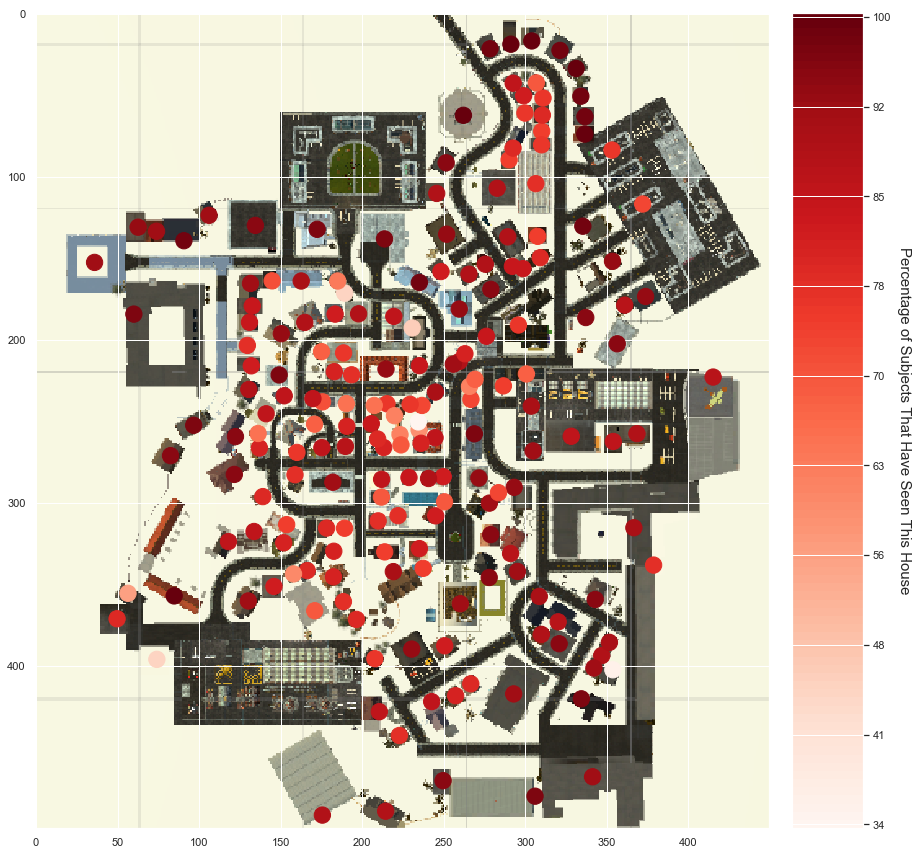

In [25]:
# open the files and extract the necessary data
SeahavenMap = Image.open('Data/map5.png')
NumClicks = pd.read_csv('Data/Clicks.csv')

x = NumClicks['x'].tolist()
y = NumClicks['y'].tolist()
clicks = NumClicks['clicks'].tolist()

# set everything up to display the Seahaven Map
fig = plt.figure(figsize=(15,15))
SeahavenMap = SeahavenMap.resize((450,500))
ax = plt.subplot2grid((10, 10), (0, 0), colspan=9,rowspan=10)
plt.imshow(SeahavenMap, aspect = 'equal')

# choose a colormap for the circles that display the houses
cmap = plt.cm.get_cmap('Reds')

# draw the circles and give them the right color (using the given colormap)
# copy-pasting from uploaded solution
for i in range(len(clicks)):
    click = clicks[i]
    rgba = cmap((click-min(clicks))/(max(clicks)-min(clicks)))
    p1 = mpatches.Circle((x[i],y[i]), radius=5, color=(rgba))
    ax.add_patch(p1)

# set everything up to display the Colormap / legend for the circle's colors
a=np.outer(np.arange(0,1,0.01),np.ones(3))
ax2 = plt.subplot2grid((10, 10), (0, 9),rowspan=10)
plt.imshow(a,aspect='auto',cmap='Reds',origin="lower")
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks(np.linspace(0,99,10))
ax2.get_yaxis().set_ticklabels(np.linspace((min(clicks)/64)*100,(max(clicks)/64)*100,10,dtype=int))
ax2.yaxis.tick_right()
ax2.set_ylabel("Percentage of Subjects That Have Seen This House",rotation=270, fontsize=15, labelpad=20)
ax2.yaxis.set_label_position("right")
plt.show()
